In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
data = pd.read_csv('data/ex2data2.txt',names=['Test1','Test2','accepted'])

In [153]:
data.head()

,Test1,Test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [154]:
data.describe()

,Test1,Test2,accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


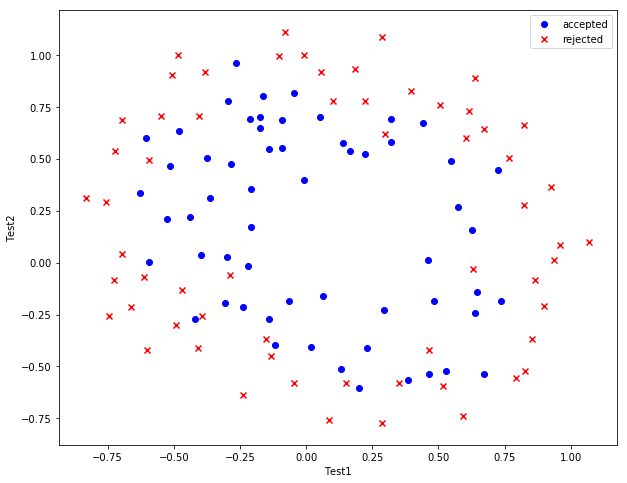

In [155]:
accepted = data[data['accepted'].isin([1])]
rejected = data[data['accepted'].isin([0])]

fig,ax = plt.subplots(figsize=(10,8))
ax.scatter(accepted['Test1'],accepted['Test2'],c = 'b', marker = 'o',label = 'accepted')
ax.scatter(rejected['Test1'],rejected['Test2'],c = 'r',marker= 'x' , label = 'rejected')
ax.legend()
ax.set_xlabel('Test1')
ax.set_ylabel('Test2')

In [156]:
data.insert(3,'ones',1)

In [157]:
x1 = data['Test1']
x2 = data['Test2']

degree = 5
for i in range(1,degree):
    for j in range(i):
        data['Feature{}{}'.format(i-j,j)] = np.power(x1,i-j)*np.power(x2,j)
data.drop('Test1',axis=1,inplace=True)
data.drop('Test2',axis=1,inplace = True)

In [158]:
data.head()

,accepted,ones,Feature10,Feature20,Feature11,Feature30,Feature21,Feature12,Feature40,Feature31,Feature22,Feature13
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [159]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [160]:
def cost(theta,X,y,learning_rate):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1-sigmoid(X*theta.T)))
    
    regparam = (learning_rate/2.0*len(X))*np.sum(np.power(theta[:,0:theta.shape[1]],2))
    
    return np.sum((first-second))/(len(X)*1.0)+regparam

In [161]:
cols = data.shape[1]
X = data.iloc[:,1:cols]
y = data.iloc[:,0:1]

In [162]:
X.head()

,ones,Feature10,Feature20,Feature11,Feature30,Feature21,Feature12,Feature40,Feature31,Feature22,Feature13
0,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [163]:
y.head()

,accepted
0,1
1,1
2,1
3,1
4,1


In [164]:
X = np.array(X.values)
y = np.array(y.values)

In [165]:
theta = np.zeros(cols-1)

In [166]:
learning_rate = 1

In [167]:
cost(theta,X,y,learnin_rate)

0.6931471805599454

In [168]:
def gradient_descent(theta,X,y,learning_rate):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    parameters = int(theta.ravel().shape[1])
    grid = np.zeros(parameters)
    
    error = sigmoid(X*theta.T)-y
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        
        if i==0:
            grid[i] = np.sum(term)/(1.0*len(X))
        else:
            grid[i] = np.sum(term)/(1.0*len(X)) + (learning_rate*(theta[:,j]))/(1.0*len(X))
            
    return grid

In [169]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta,fprime=gradient_descent,args=(X,y,learning_rate))

In [170]:
result

(array([  1.51483595e-04,   1.42066748e-04,  -5.06858190e-04,
         -1.24593863e-04,   1.49063917e-05,  -6.60276488e-05,
         -4.89653907e-05,  -3.88156202e-04,   2.00981562e-05,
         -1.71538386e-04,   7.43544290e-06]), 96, 4)

In [171]:
def predict(X,theta):
    theta = np.matrix(theta)
    predicts = sigmoid(X*theta.T)
    return [1 if x>0.5 else 0 for x in predicts]

In [172]:
predictions = predict(X,result[0])

In [173]:
correct= [1 if (a==1 and b==1) or (a==0 and b==0) else 0 for (a,b) in zip(predictions,y)]

In [174]:
accuracy = np.sum(correct)/(1.0*len(correct))

In [175]:
accuracy

0.66101694915254239

0.69312575021364864

29